<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
# type your code here
df_malaria=pd.read_csv('malaria.csv')

In [3]:
df_malaria.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df_malaria.shape

(127, 16)

In [18]:
# type your code here
df_malaria[df_malaria.isnull().sum(axis=1)==16]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#there are 4 rows where there are no recorrds.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
null_percentage=df_malaria.isnull().sum()/len(df_malaria)*100
null_percentage[null_percentage>60]

Cases_Nigeria     70.078740
Cases_Senegal     80.314961
Cases_Spain       87.401575
Cases_Mali        90.551181
Deaths_Nigeria    70.078740
Deaths_Senegal    82.677165
Deaths_Spain      87.401575
Deaths_Mali       90.551181
dtype: float64

In [ ]:
#There are 8 columns who are having more than 60% null values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
df_malaria.columns[:4]

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria'], dtype='object')

In [24]:
guinea_df=df_malaria[['Cases_Guinea','Deaths_Guinea']]
print("Null values in guinea are:",guinea_df.isnull().sum().sum())

Null values in guinea are: 69


In [25]:
liberia_df=df_malaria[['Cases_Liberia','Deaths_Liberia']]
print("Null values in liberia are:",liberia_df.isnull().sum().sum())

Null values in liberia are: 90


In [26]:
SierraLeone_df=df_malaria[['Cases_SierraLeone','Deaths_SierraLeone']]
print("Null values in SierraLeone are:",SierraLeone_df.isnull().sum().sum())

Null values in SierraLeone are: 80


In [28]:
Nigeria_df=df_malaria[['Cases_Nigeria','Deaths_Nigeria']]
print("Null values in Nigeria are:",Nigeria_df.isnull().sum().sum())

Null values in Nigeria are: 178


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

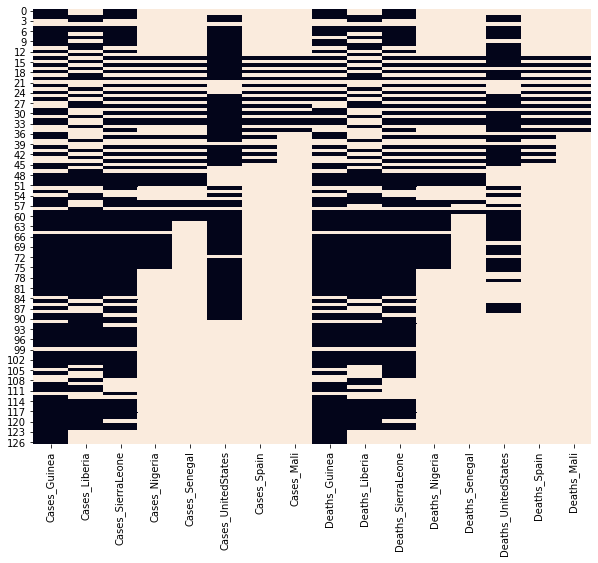

In [14]:
# type your code here
plt.figure(figsize=(10,8))
sns.heatmap(df_malaria.isnull(),cbar=False)

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
df_malaria.dropna(axis=0,thresh=2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
null_percentage=df_malaria.isnull().sum()/len(df_malaria)*100
null_percentage[null_percentage>60].index

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [33]:
df_malaria.drop(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],axis=1)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df_malaria.isnull().sum()/len(df_malaria)*100


Cases_Guinea           26.771654
Cases_Liberia          34.645669
Cases_SierraLeone      31.496063
Cases_Nigeria          70.078740
Cases_Senegal          80.314961
Cases_UnitedStates     42.519685
Cases_Spain            87.401575
Cases_Mali             90.551181
Deaths_Guinea          27.559055
Deaths_Liberia         36.220472
Deaths_SierraLeone     31.496063
Deaths_Nigeria         70.078740
Deaths_Senegal         82.677165
Deaths_UnitedStates    55.118110
Deaths_Spain           87.401575
Deaths_Mali            90.551181
dtype: float64

<AxesSubplot:xlabel='Cases_Liberia'>

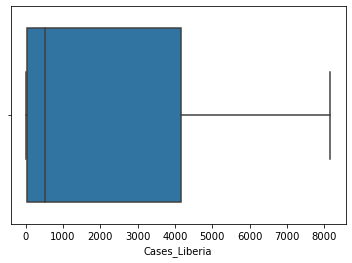

In [11]:
sns.boxplot(df_malaria['Cases_Liberia'])

In [34]:
df_malaria['Cases_Liberia'].skew()

0.9491336030709361

In [37]:
df_malaria['Cases_Liberia']=df_malaria['Cases_Liberia'].fillna(df_malaria['Cases_Liberia'].mean())
df_malaria['Cases_Liberia'].isnull().sum()
#as there are no outliers so we can replace the value with there mean value.

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Cases_UnitedStates'>

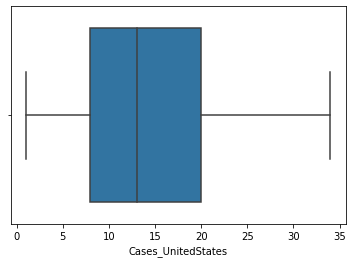

In [21]:
# type your code here
sns.boxplot(df_malaria['Cases_UnitedStates'])

In [42]:
#From the above plot we can understand that there are no outliers so that we can fill it with the avg value.
df_malaria['Cases_UnitedStates']=df_malaria['Cases_UnitedStates'].fillna(df_malaria['Cases_UnitedStates'].mean())
df_malaria['Cases_UnitedStates'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
guinea_df.isnull().sum()

Cases_Guinea     34
Deaths_Guinea    35
dtype: int64

In [87]:
guinea_df.skew()

Cases_Guinea     1.002301
Deaths_Guinea    1.108879
dtype: float64

<AxesSubplot:>

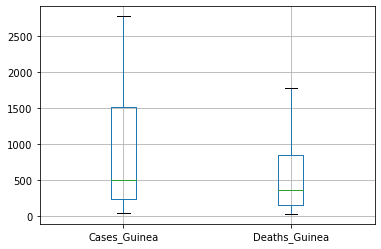

In [88]:
guinea_df.boxplot()

In [89]:
guinea_df.mean()

Cases_Guinea     911.064516
Deaths_Guinea    563.239130
dtype: float64

In [103]:
guinea_df.median()

Cases_Guinea     495.0
Deaths_Guinea    360.5
dtype: float64

In [107]:
df_malaria.Cases_Guinea.fillna(df_malaria['Cases_Guinea'].mean())
df_malaria.Deaths_Guinea.fillna(df_malaria['Deaths_Guinea'].mean())

0      1786.00000
1      1781.00000
2      1767.00000
3       563.23913
4       563.23913
          ...    
122      66.00000
123      62.00000
124      60.00000
125      59.00000
126      29.00000
Name: Deaths_Guinea, Length: 127, dtype: float64

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [46]:
df_house=pd.read_csv('house.csv')

In [47]:
df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

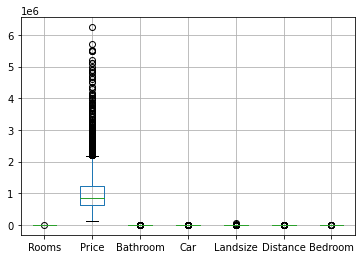

In [49]:
# type your code here
df_house.boxplot()

<AxesSubplot:>

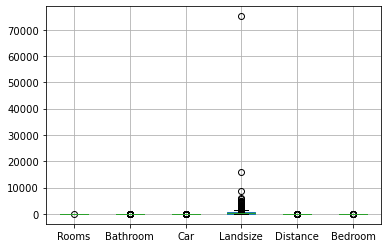

In [53]:
df_house.loc[:,df_house.columns!='Price'].boxplot()

<AxesSubplot:>

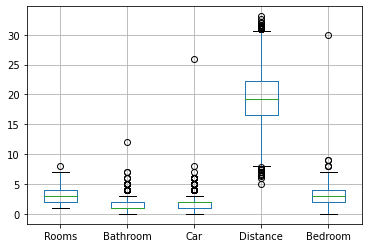

In [54]:
df_house.drop(['Price','Landsize'],axis=1).boxplot()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
Q1=df_house['Car'].quantile(0.25)
Q3=df_house['Car'].quantile(0.75)
IQR=Q3-Q1
IQR

1.0

In [60]:
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

df_house['Car'][(df_house['Car']>UB)|(df_house['Car']<LB)].unique()


array([ 5,  4,  6,  7, 26,  8], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# type your code here
df_house.loc[:,['Type','Price']]

,Type,Price
0,h,1490000
1,h,1220000
2,h,1420000
3,h,1515000
4,h,670000
...,...,...
4761,h,1150000
4762,h,712000
4763,h,800000
4764,u,747000


<AxesSubplot:xlabel='Type', ylabel='Price'>

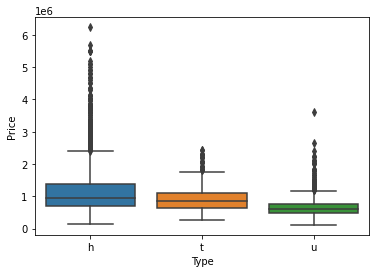

In [62]:
sns.boxplot(x=df_house['Type'],y=df_house['Price'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here
from scipy.stats import zscore
df_house['Rooms'][(zscore(df_house['Rooms'])>3)].unique()

array([7, 6, 8], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here
#We can Use Either Zscore or IQR method here..

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
# type your code here
Q1=df_house['Bedroom'].quantile(0.25)
Q3=df_house['Bedroom'].quantile(0.75)
IQR=Q3-Q1

UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

df_house['Bedroom'][(df_house['Bedroom']>UB)|(df_house['Bedroom']<LB)].unique()


array([ 8,  9, 30], dtype=int64)

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# type your code here
df_house['Distance'].mean()

19.32834662190515

In [81]:
Q1=df_house['Distance'].quantile(0.25)
Q3=df_house['Distance'].quantile(0.75)
IQR=Q3-Q1


UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

df_house['Distance'][(df_house['Distance']>UB)|(df_house['Distance']<LB)]
without_outliers=df_house[(df_house['Distance']<=UB)&(df_house['Distance']>=LB)]

In [82]:
without_outliers['Distance'].mean()

19.311425554382247

In [83]:
df_house['Distance'].mean() - without_outliers['Distance'].mean()

0.016921067522904565

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

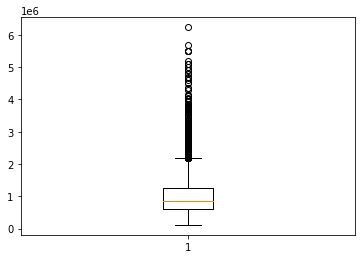

In [69]:
# type your code here
plt.boxplot(df_house['Price'])
plt.show()

2


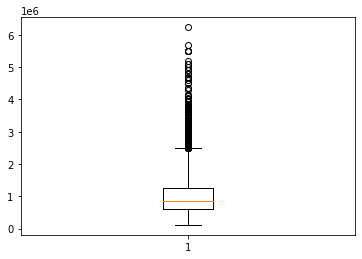

3


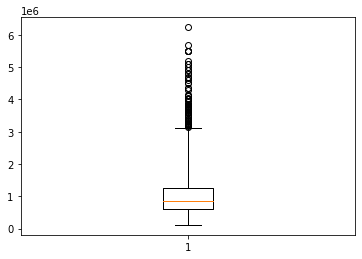

4


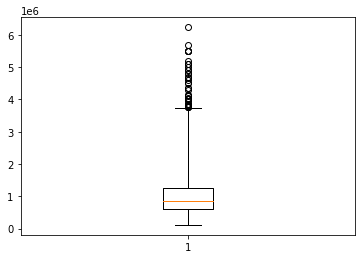

5


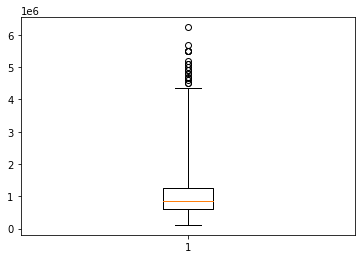

6


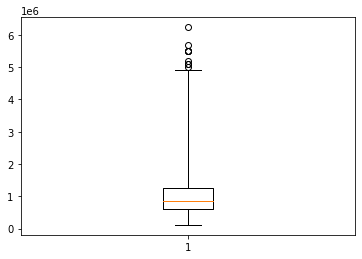

7


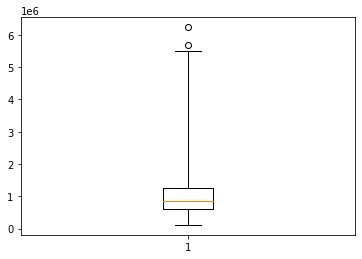

8


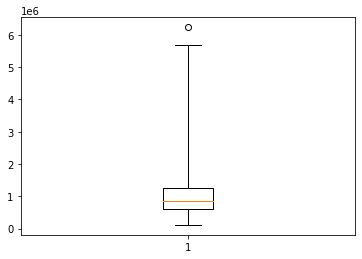

9


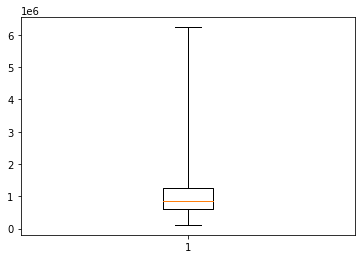

10


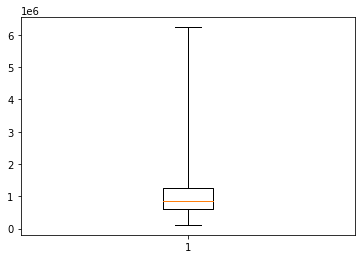

11


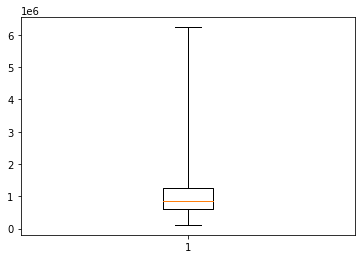

In [71]:
for i in range(2,12):
    print(i)
    plt.boxplot(df_house['Price'],whis=i)
    plt.show()

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# type your code here
df_house['Distance_group']=pd.cut(df_house['Distance'],bins=3,labels=['Nearby','walkingDistance','Faraway'])
df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Distance_group
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,Faraway
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,walkingDistance
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,walkingDistance
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,walkingDistance
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,walkingDistance


In [ ]:
#there there 3 groups binding

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Distance_group', ylabel='Price'>

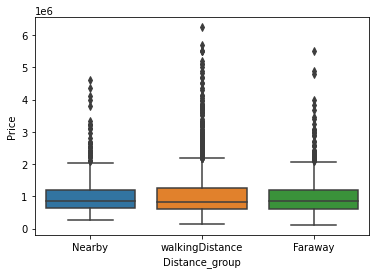

In [84]:
# type your code here
sns.boxplot(x=df_house['Distance_group'],y=df_house['Price'])

In [ ]:
# There are price based on the 3 distance group

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
# type your code here
from sklearn.model_selection import train_test_split
train_price,test_price=train_test_split(df_house['Price'],train_size=0.80)

In [80]:
train_price.shape,test_price.shape

((3812,), (954,))